# <center>EDA Analysis</center>

In [1]:
import pandas as pd
import numpy as np
import matplotlib as mlp
import matplotlib.pyplot as plt 
%matplotlib inline

In [2]:
car_dataset = pd.read_csv("cars.csv")

In [3]:
dataSet = pd.DataFrame(car_dataset)
dataSet

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149
...,...,...,...,...,...
76,322,36.900000,50,169.598513,16.132947
77,238,19.197888,115,150.576579,37.923113
78,263,34.000000,50,151.598513,15.769625
79,295,19.833733,119,167.944460,39.423099


In [4]:
dataSet.head(5)

,HP,MPG,VOL,SP,WT
0,49,53.700681,89,104.185353,28.762059
1,55,50.013401,92,105.461264,30.466833
2,55,50.013401,92,105.461264,30.193597
3,70,45.696322,92,113.461264,30.632114
4,53,50.504232,92,104.461264,29.889149


## <center>General Information</center>

In [5]:
dataSet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81 entries, 0 to 80
Data columns (total 5 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   HP      81 non-null     int64  
 1   MPG     81 non-null     float64
 2   VOL     81 non-null     int64  
 3   SP      81 non-null     float64
 4   WT      81 non-null     float64
dtypes: float64(3), int64(2)
memory usage: 3.3 KB


In [6]:
dataSet.shape

(81, 5)

In [7]:
dataSet.describe()

,HP,MPG,VOL,SP,WT
count,81.000000,81.000000,81.000000,81.000000,81.000000
mean,117.469136,34.422076,98.765432,121.540272,32.412577
std,57.113502,9.131445,22.301497,14.181432,7.492813
min,49.000000,12.101263,50.000000,99.564907,15.712859
25%,84.000000,27.856252,89.000000,113.829145,29.591768
50%,100.000000,35.152727,101.000000,118.208698,32.734518
75%,140.000000,39.531633,113.000000,126.404312,37.392524
max,322.000000,53.700681,160.000000,169.598513,52.997752


## <center>Data Cleaning</center>

In [8]:
dataSet.isnull().sum()

HP     0
MPG    0
VOL    0
SP     0
WT     0
dtype: int64

## <center> Data Exploration </center>

In [9]:
dataSet.nunique()

HP     40
MPG    50
VOL    34
SP     68
WT     81
dtype: int64

## <center> Data Visualization </center>

<Axes: >

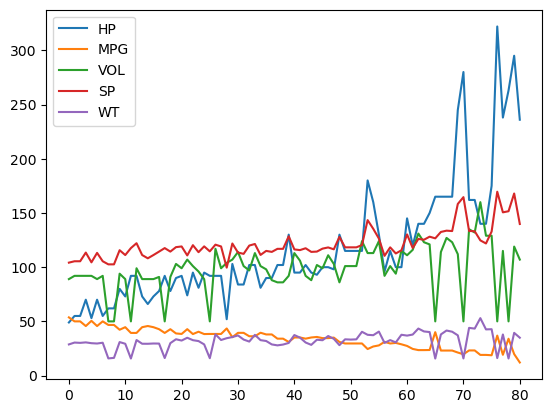

In [10]:
# Line Plot
dataSet.plot()

array([[<Axes: title={'center': 'HP'}>, <Axes: title={'center': 'MPG'}>],
       [<Axes: title={'center': 'VOL'}>, <Axes: title={'center': 'SP'}>],
       [<Axes: title={'center': 'WT'}>, <Axes: >]], dtype=object)

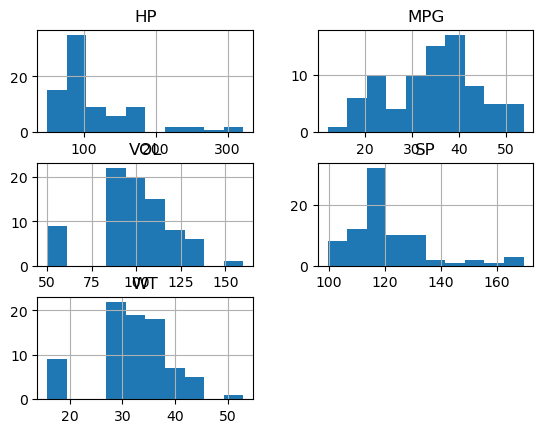

In [11]:
# Histogram
dataSet.hist()

<Axes: >

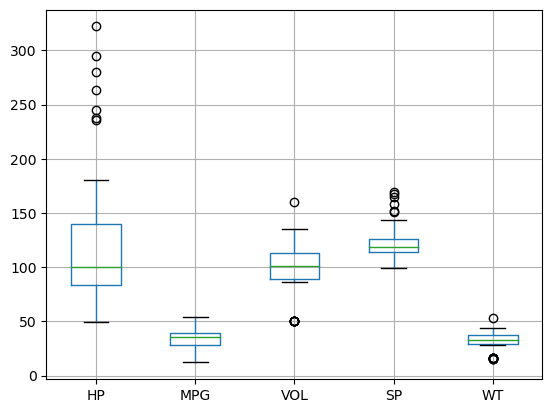

In [12]:
# Boxer Plot
dataSet.boxplot()

## <center> **Correlation and Statistics** </center>

In [13]:
dataSet.corr()

,HP,MPG,VOL,SP,WT
HP,1.000000,-0.725038,0.077459,0.973848,0.076513
MPG,-0.725038,1.000000,-0.529057,-0.687125,-0.526759
VOL,0.077459,-0.529057,1.000000,0.102170,0.999203
SP,0.973848,-0.687125,0.102170,1.000000,0.102439
WT,0.076513,-0.526759,0.999203,0.102439,1.000000


In [14]:
dataSet.cov()

,HP,MPG,VOL,SP,WT
HP,3261.952160,-378.128374,98.661420,788.769441,32.743062
MPG,-378.128374,83.383283,-107.739670,-88.980548,-36.040966
VOL,98.661420,-107.739670,497.356790,32.313019,166.967784
SP,788.769441,-88.980548,32.313019,201.113002,10.885067
WT,32.743062,-36.040966,166.967784,10.885067,56.142247


In [15]:
dataSet.mean()

HP     117.469136
MPG     34.422076
VOL     98.765432
SP     121.540272
WT      32.412577
dtype: float64

## <center> Outlier Detection & Removal </center>

In [16]:
def remove_outliers(df, column_names):
    for column_name in column_names:
        Q1 = df[column_name].quantile(0.25)
        Q3 = df[column_name].quantile(0.75)
        IQR = Q3 - Q1
        
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        
        outliers = df[(df[column_name] < lower_bound) | (df[column_name] > upper_bound)]
        
        df = df.drop(outliers.index)
    
    return df

In [17]:
df = remove_outliers(dataSet, ['HP', 'MPG', 'VOL', 'SP', 'WT'])

In [18]:
df.shape

(64, 5)

In [19]:
dataSet.shape

(81, 5)